In [105]:
df = pd.read_csv("tested.csv")

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


#THE NAME IS IRRELEVANT, SO WE DROP IT

In [109]:
df.drop(columns=['Name'],inplace=True)

# Cleaning

In [110]:
df.shape

(418, 11)

In [111]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

###### Missing Values

In [112]:
df['Age'].replace(np.nan,df['Age'].mean(),inplace=True)
df['Fare'].replace(np.nan,df['Fare'].mean(),inplace=True)
#we drop Cabin as 327/418 are null values
df.drop(columns=['Cabin'],inplace=True)

# Exploration

In [113]:
categorical = ['Sex','Ticket']

In [114]:
for i in categorical:
    print(df[i].value_counts())
    print()

Sex
male      266
female    152
Name: count, dtype: int64

Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64



<BarContainer object of 2 artists>

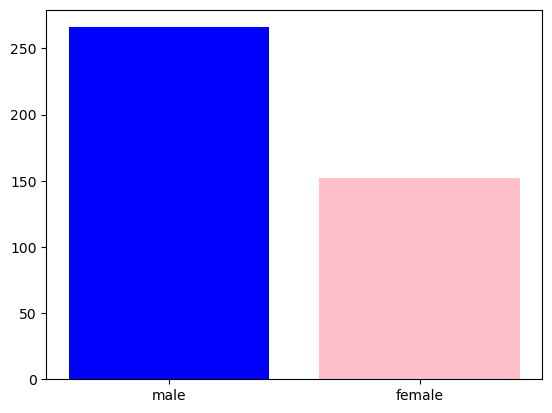

In [115]:
plt.bar(df['Sex'].value_counts().index,df['Sex'].value_counts(),color=['Blue','Pink'])

<Axes: xlabel='Survived', ylabel='count'>

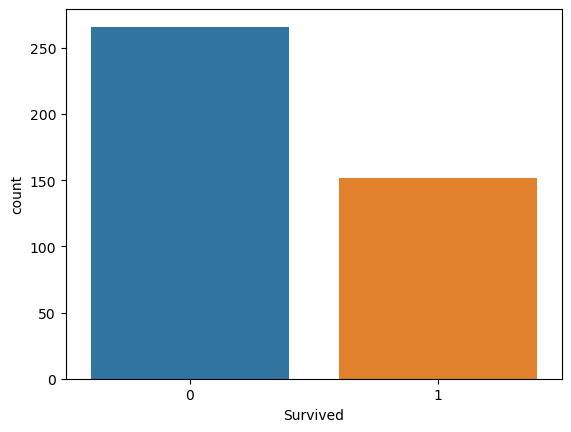

In [116]:
sns.countplot(x=df['Survived'])

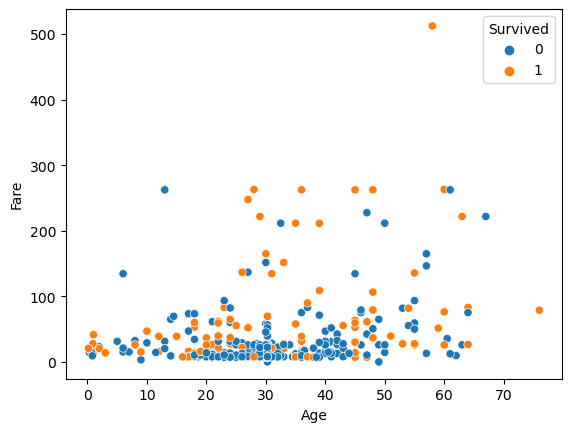

In [117]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

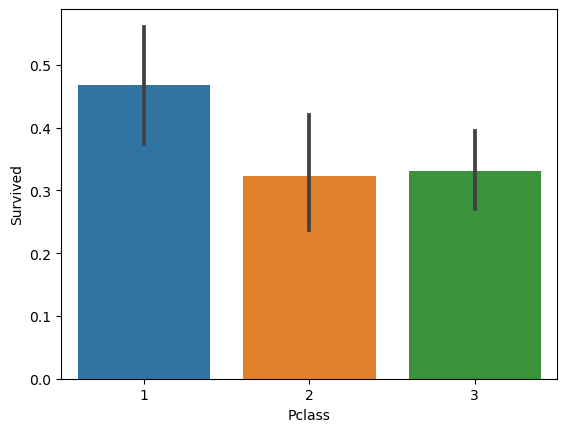

In [118]:
sns.barplot(data=df,x='Pclass', y='Survived')

C:\Users\Aagash\AppData\Local\Temp\ipykernel_17368\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

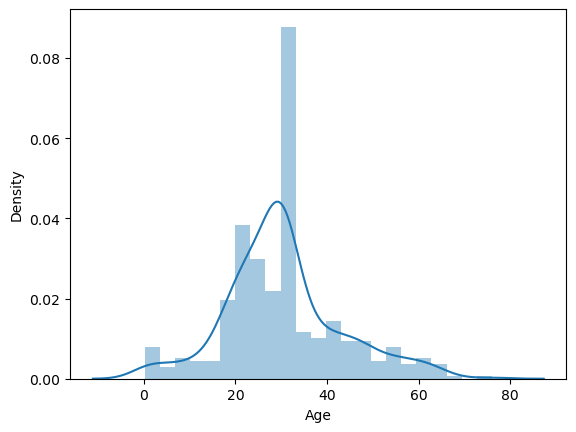

In [119]:
sns.distplot(df['Age'])

C:\Users\Aagash\AppData\Local\Temp\ipykernel_17368\95424154.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

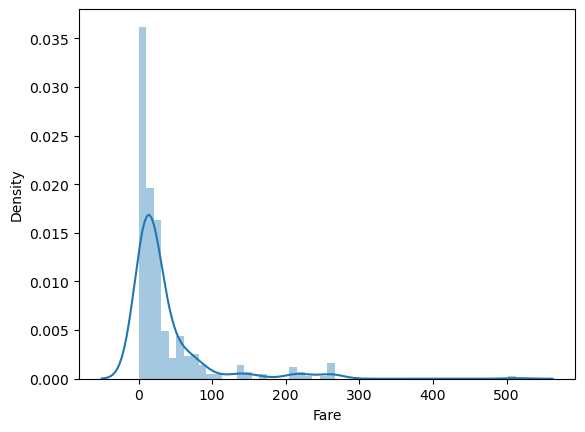

In [122]:
sns.distplot(df['Fare'])

In [124]:
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 18, 65, 150], labels=['Children', 'Adults', 'Seniors'])

<Axes: xlabel='Embarked', ylabel='Survived'>

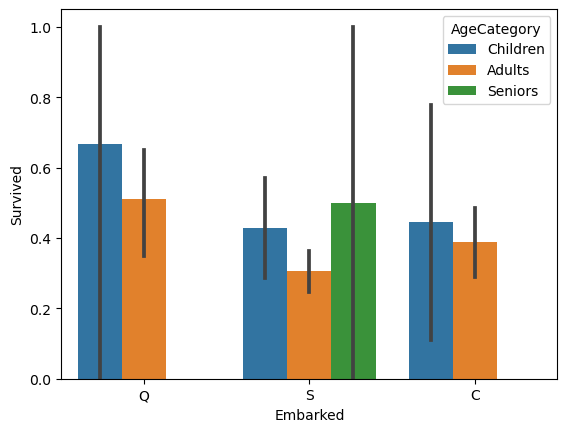

In [125]:
sns.barplot(data=df,x='Embarked', y='Survived',hue='AgeCategory')

<Axes: xlabel='Pclass', ylabel='Survived'>

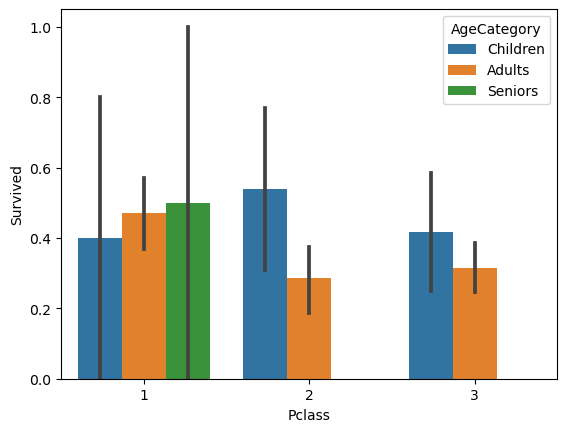

In [70]:
sns.barplot(data=df,x='Pclass', y='Survived',hue='AgeCategory')

In [73]:
df['Ticket'].unique().size

363

###### lets remove it

In [74]:
df.drop(columns=['Ticket'],inplace=True)

In [75]:
df.drop(columns=['AgeCategory'],inplace=True)

In [81]:
df.drop(columns=['PassengerId'],inplace=True)

##### Feature Engineering 

###### Convert sex to numerical

In [77]:
df['Sex'].replace({'male':1, 'female':0}, inplace=True)
df['Embarked'].replace({'Q':0, 'S':1, 'C':2}, inplace=True)

<Axes: >

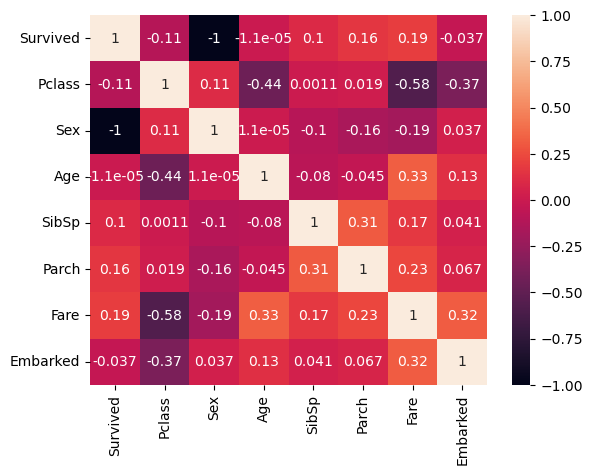

In [82]:
sns.heatmap(df.corr(),annot=True)

# Lets Try with Random Forest model

In [84]:
X = df.drop('Survived',axis=1)
Y = df['Survived']

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [85]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=7)

In [87]:
rfc = RandomForestClassifier(n_estimators=100,random_state=7)

In [88]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=7)

In [89]:
y_pred = rfc.predict(x_test)

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


# We got 100% accuracy

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

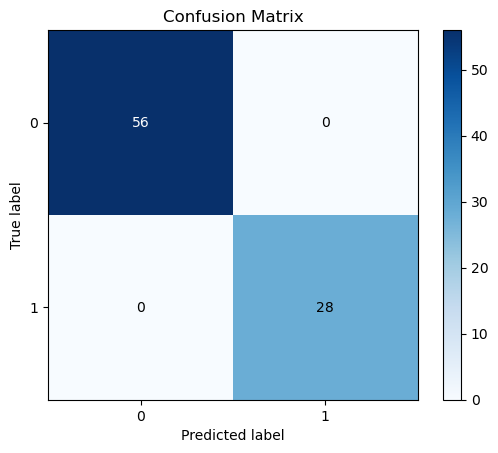

In [100]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

### Exporting model for further use

In [126]:
import joblib
joblib.dump(rfc, 'titanic_prediction.pkl')

['titanic_prediction.pkl']